<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Titanic Survival Prediction
    </h3>
    </div>

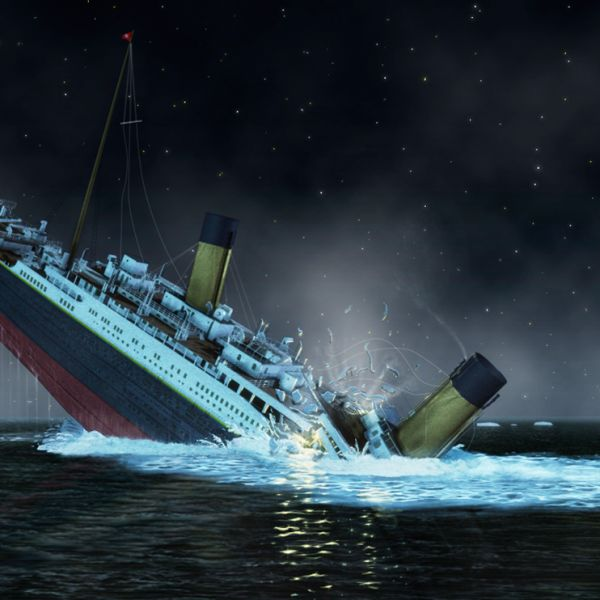

* **Importing Libraries and Loading Data**

* **Data Information and Data Cleaning**

* **Building The Model**

* **Conclusion**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Visulization**

Percentage of females who survived: 1      1
4      1
6      1
8      1
12     1
      ..
409    1
410    1
411    1
412    1
414    1
Name: Survived, Length: 152, dtype: int64
Percentage of males who survived: 0      0
2      0
3      0
5      0
7      0
      ..
407    0
413    0
415    0
416    0
417    0
Name: Survived, Length: 266, dtype: int64


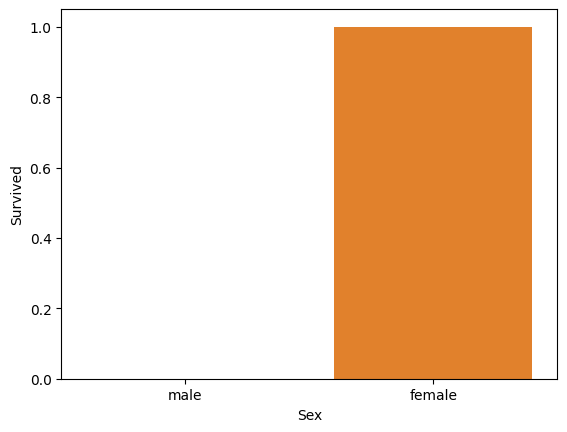

In [ ]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df)
#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Sex"] =='female'])

print("Percentage of males who survived:",df["Survived"][df["Sex"] =='male'])

Percentage of Pclass = 1 who survived: 46.728971962616825
Percentage of Pclass = 2 who survived: 32.25806451612903
Percentage of Pclass = 3 who survived: 33.02752293577982


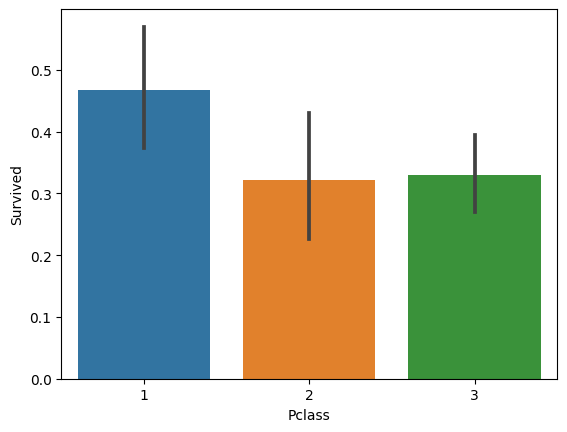

In [ ]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 31.09540636042403
Percentage of SibSp = 1 who survived: 49.09090909090909
Percentage of SibSp = 2 who survived: 42.857142857142854


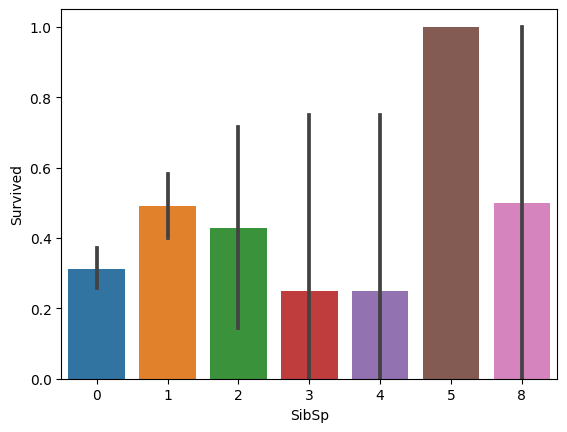

In [ ]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

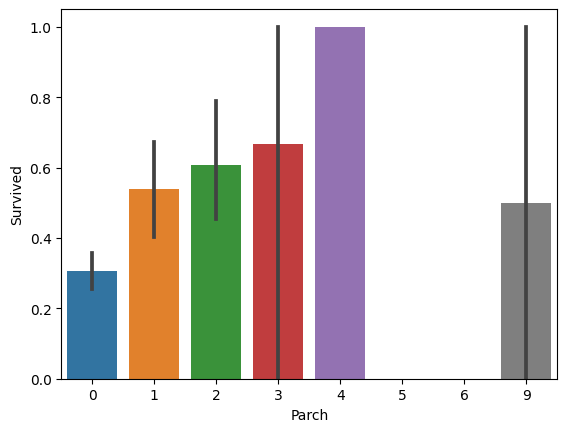

In [ ]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Data Information and Data Cleaning
    </h3>
    </div>

In [ ]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(df)
result

,Missing Values,Percentage
PassengerId,0,0.0%
Survived,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
Age,86,20.57%
SibSp,0,0.0%
Parch,0,0.0%
Ticket,0,0.0%
Fare,1,0.24%


In [ ]:
df = df.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,A21,S


In [ ]:
df['Age'] = df['Age'].round().astype(int)

In [ ]:
df['Fare'] = df['Fare'].round().astype(int)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23,1,0,21228,82,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47,1,0,W.E.P. 5734,61,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48,1,3,PC 17608,262,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22,0,1,113509,62,B36,C
28,920,0,1,"Brady, Mr. John Bertram",1,41,0,0,113054,30,A21,S


In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked'],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  87 non-null     int64
 1   Pclass    87 non-null     int64
 2   Sex       87 non-null     int64
 3   Age       87 non-null     int64
 4   SibSp     87 non-null     int64
 5   Parch     87 non-null     int64
 6   Fare      87 non-null     int64
dtypes: int64(7)
memory usage: 5.4 KB


Percentage of females who survived: <bound method IndexOpsMixin.value_counts of Series([], Name: Survived, dtype: int64)>
Percentage of males who survived: <bound method IndexOpsMixin.value_counts of Series([], Name: Survived, dtype: int64)>


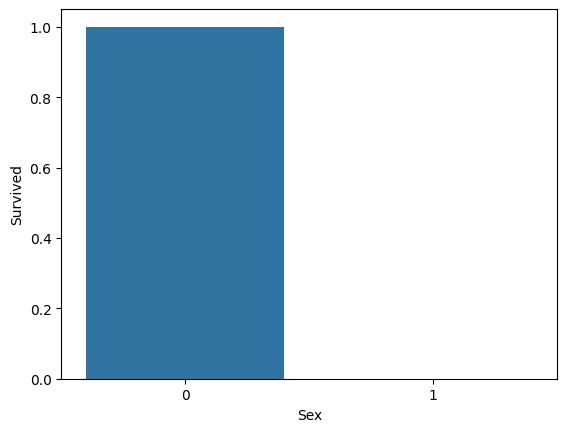

In [ ]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts)

print("Percentage of males who survived:", df["Survived"][df["Sex"] == 'male'].value_counts)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Building Model
    </h3>
    </div>

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69, 6)
(69, 1)
(18, 6)
(18, 1)


In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=6))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
past = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 1s 240ms/step - loss: 0.2685 - mean_absolute_error: 0.4238 - val_loss: 0.2324 - val_mean_absolute_error: 0.3678
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2590 - mean_absolute_error: 0.4161 - val_loss: 0.2236 - val_mean_absolute_error: 0.3609
Epoch 3/50
2/2 [==============================] - 0s 53ms/step - loss: 0.2505 - mean_absolute_error: 0.4095 - val_loss: 0.2148 - val_mean_absolute_error: 0.3539
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.2410 - mean_absolute_error: 0.4012 - val_loss: 0.2064 - val_mean_absolute_error: 0.3469
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.2327 - mean_absolute_error: 0.3943 - val_loss: 0.1981 - val_mean_absolute_error: 0.3399
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 0.2242 - mean_absolute_error: 0.3872 - val_loss: 0.1899 - val_mean_absolute_error: 0.3327
Epoch 7/50
2/2 [=================

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 141ms/step


In [ ]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score is:",R2 )

R2 Score is: 0.8934917651500112
